In [ ]:
#pip install requests
#pip install bs4
#! pip install beautifulsoup4
#! pip install seaborn
#! pip3 install streamlit

In [9]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import requests
import seaborn as sns
from bs4 import BeautifulSoup
from urllib.parse import urlparse
# Solicitar el nombre por teclado
userName = input("¿Cuál es tu nombre?:")
# Solicitar el identificador por teclado
identificador = input("¿Cuál es el Id del resultado del test?:")

while True:
    # Concatenar el identificador a la URL base del sitio web
    url = f"https://bigfive-test.com/result/{identificador}"

    # Obtener la respuesta HTTP de la URL
    response = requests.get(url)

    # Buscar la frase ""Request failed with status code 500"" en la URL    
    if "Request failed with status code 500" in response.text:
     identificador = input("La URL no es válida. Por favor, verifica el identificador del resultado del test.")
    else:
     # Crear el objeto soup object desde response
     soup = BeautifulSoup(response.content, "html.parser")
     break


# Definiendo la lista de atributos a extraer
atributos = ["Neurosis", "Ansiedad", "Ira", "Depresión", "Vergüenza", 
              "Falta de moderacion", "Vulnerabilidad", "Extroversión", 
              "Cordialidad", "Sociabilidad", "Confianza", "Nivel de actividad", 
              "Búsqueda de nuevas experiencias", "Alegría", "Apertura a experiencias", 
              "Imaginación", "Interes artístico", "Sensibilidad", "Ansias de aventura", 
              "Intelecto", "Liberalismo", "Simpatía", "Confianza", "Moral", "Altruismo", 
              "Cooperación", "Modestia", "Empatía", "Meticulosidad", "Autoeficacia", 
              "Orden", "Sentido del deber", "Orientación a objetivos", "Disciplina", "Prudencia"]

# Creando una lista para almacenar los resultados
resultados = [identificador, userName.title()]

# loop over the attributes and extract the corresponding scores
for atributo in atributos:
    # find the corresponding div
    div = soup.find("a", {"href": f"#{atributo.lower()}"})
    # extract the score
    score = div.find_next('p').text.split(":")[1].strip()
    # Validando que el resultado a extraer sean solo dos digitos
    if score[3] == "-":
        score = int(score[:2])
    else:        
        # Validando que el resultado a extraer sean solo un digito
        if score[2] == "-":
            score = int(score[:1])
        # Validando que el resultado a extraer sean tres digitos
        else:
            score = int(score[:3])   
        
    # append the attribute name and score to the results list
    resultados.append(score)    

print(resultados)
# create a pandas DataFrame from the results list

testPersonalidad = pd.DataFrame([resultados], columns=["Identificador", "Nombre","Neurosis", "Ansiedad", "Ira", "Depresión", "Vergüenza", 
                                                        "Falta de moderacion", "Vulnerabilidad", "Extroversión", 
                                                        "Cordialidad", "Sociabilidad", "Confianza", "Nivel de actividad", 
                                                        "Búsqueda de nuevas experiencias", "Alegría", "Apertura a experiencias", 
                                                        "Imaginación", "Interes artístico", "Sensibilidad", "Ansias de aventura", 
                                                        "Intelecto", "Liberalismo", "Simpatía", "Confianza 2", "Moral", "Altruismo", 
                                                        "Cooperación", "Modestia", "Empatía", "Meticulosidad", "Autoeficacia", 
                                                        "Orden", "Sentido del deber", "Orientación a objetivos", "Disciplina", "Prudencia"
                                                         ])

# print the DataFrame
#print(testPersonalidad)
"""
#Creando la grafica 
testGrafica = testPersonalidad.loc[:, ["Ansiedad", "Ira", "Depresión", "Vergüenza", "Falta de moderacion", "Vulnerabilidad",                                                          
                                                        "Cordialidad", "Sociabilidad", "Confianza", "Nivel de actividad", 
                                                        "Búsqueda de nuevas experiencias", "Alegría", "Imaginación", 
                                                        "Interes artístico", "Sensibilidad", "Ansias de aventura", 
                                                        "Intelecto", "Liberalismo", "Confianza 2", "Moral", "Altruismo", 
                                                        "Cooperación", "Modestia", "Empatía", "Autoeficacia", "Orden", 
                                                        "Sentido del deber", "Orientación a objetivos", "Disciplina", "Prudencia"
                                                         ]]
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(testGrafica.iloc[0], marker = 'o')
plt.xticks(rotation=90)
ax.set_title(userName.title(), loc = "left", fontdict = {'fontsize':12, 'fontweight':'bold', 'color':'tab:blue'})
ax.set_ylabel("Puntuación")
ax.set_ylim(bottom=0, top=25)
ax.set_yticks(range(0, 26, 5))
fig.savefig(userName.title() + " test personalidad todo.png")

datos5 = testPersonalidad.loc[:, ["Neurosis", "Extroversión", "Apertura a experiencias", "Simpatía", "Meticulosidad"]]

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(datos5.iloc[0], marker = 'o')
ax.set_title(userName.title(), loc="left", fontdict={"fontsize":12, "fontweight":"bold", "color":"tab:blue"})
ax.set_ylabel("Puntuación")
ax.set_ylim(bottom=0, top=120)
#plt.xticks(rotation=0)
fig.savefig(userName.title() + " test personalidad 5.png")
"""

['6452b1123b1aeb00089f18c9', 'Jorge Rene Marquez Magallanes', 85, 16, 12, 17, 12, 15, 13, 52, 8, 12, 8, 8, 8, 8, 90, 15, 16, 19, 8, 20, 12, 62, 8, 16, 12, 13, 4, 13, 103, 19, 20, 20, 16, 8, 20]


'\n#Creando la grafica \ntestGrafica = testPersonalidad.loc[:, ["Ansiedad", "Ira", "Depresión", "Vergüenza", "Falta de moderacion", "Vulnerabilidad",                                                          \n                                                        "Cordialidad", "Sociabilidad", "Confianza", "Nivel de actividad", \n                                                        "Búsqueda de nuevas experiencias", "Alegría", "Imaginación", \n                                                        "Interes artístico", "Sensibilidad", "Ansias de aventura", \n                                                        "Intelecto", "Liberalismo", "Confianza 2", "Moral", "Altruismo", \n                                                        "Cooperación", "Modestia", "Empatía", "Autoeficacia", "Orden", \n                                                        "Sentido del deber", "Orientación a objetivos", "Disciplina", "Prudencia"\n                                                        

In [10]:
import sqlite3

# Nombre del archivo de la base de datos
db_file = "test_personalidad.db"

# Nombre de la tabla en la base de datos
table_name = "test_personalidad"

# Crear una conexión a la base de datos
conn = sqlite3.connect(db_file)

# Crear la tabla en la base de datos si no existe
create_table_query = f"""
CREATE TABLE IF NOT EXISTS {table_name} (
    Identificador TEXT PRIMARY KEY,
    Nombre TEXT,
    Neurosis INTEGER,
    Ansiedad INTEGER,
    Ira INTEGER,
    Depresión INTEGER,
    Vergüenza INTEGER,
    "Falta de moderacion" INTEGER,
    Vulnerabilidad INTEGER,
    Extroversión INTEGER,
    Cordialidad INTEGER,
    Sociabilidad INTEGER,
    Confianza INTEGER,
    "Nivel de actividad" INTEGER,
    "Búsqueda de nuevas experiencias" INTEGER,
    Alegría INTEGER,
    "Apertura a experiencias" INTEGER,
    Imaginación INTEGER,
    "Interes artístico" INTEGER,
    Sensibilidad INTEGER,
    "Ansias de aventura" INTEGER,
    Intelecto INTEGER,
    Liberalismo INTEGER,
    Simpatía INTEGER,
    "Confianza 2" INTEGER,
    Moral INTEGER,
    Altruismo INTEGER,
    Cooperación INTEGER,
    Modestia INTEGER,
    Empatía INTEGER,
    Meticulosidad INTEGER,
    Autoeficacia INTEGER,
    Orden INTEGER,
    "Sentido del deber" INTEGER,
    "Orientación a objetivos" INTEGER,
    Disciplina INTEGER,
    Prudencia INTEGER
)
"""
conn.execute(create_table_query)
conn.commit()

# Validar si el identificador ya existe en la base de datos
def validar_identificador(identificador):
    select_query = f"SELECT Identificador FROM {table_name} WHERE Identificador = ?"
    cursor = conn.execute(select_query, (identificador,))
    existing_row = cursor.fetchone()
    return existing_row is not None

# Insertar el registro en la base de datos
def insertar_registro(resultados):
    insert_query = f"INSERT INTO {table_name} VALUES ({','.join(['?'] * len(resultados))})"
    conn.execute(insert_query, resultados)
    conn.commit()

# Iterar sobre los registros y validar si el identificador ya existe en la base de datos
identificador = resultados[0]

if validar_identificador(identificador):
     print(f"El identificador {identificador} ya existe en la base de datos. No se duplicará el registro.")
else:
    insertar_registro(resultados)
    print(f"Se ha insertado el registro con el identificador {identificador} en la base de datos.")

# Cerrar la conexión a la base de datos
conn.close()

6452b1123b1aeb00089f18c9
Se ha insertado el registro con el identificador 6452b1123b1aeb00089f18c9 en la base de datos.


In [14]:
conexion=sqlite3.connect("test_personalidad.db")
cursor=conexion.execute("select Identificador,Nombre,Neurosis,Extroversión,\"Apertura a experiencias\",Simpatía,Meticulosidad  from test_personalidad")
for fila in cursor:
    print(fila)
conexion.close()

('641b95934e456b000837e1e6', 'Juan Manuel Ruiz Aranda', 62, 91, 91, 84, 73)
('6452b1123b1aeb00089f18c9', 'Jorge Rene Marquez Magallanes', 85, 52, 90, 62, 103)


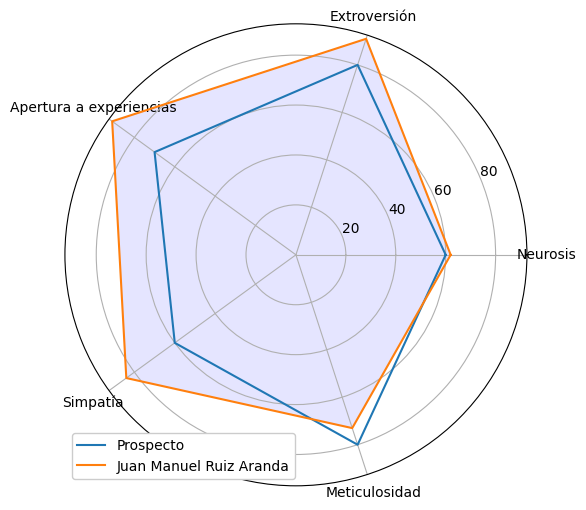

In [7]:
import numpy as np
import seaborn as sns

datos5 = testPersonalidad.loc[:, ["Neurosis", "Extroversión", "Apertura a experiencias", "Simpatía", "Meticulosidad"]]

etiquetas=['Neurosis', 'Extroversión', 'Apertura a experiencias', 'Simpatía', 'Meticulosidad']

lista = list(datos5.iloc[0])
lista=np.concatenate((lista, [lista[0]]))
esperado = (60, 80, 70, 60, 80, 60)


plt.figure(figsize =(10, 6))
plt.subplot(polar = True)

theta = np.linspace(0, 2 * np.pi, len(lista))

lineas, labels = plt.thetagrids(range(0, 360, int(360/len(etiquetas))),
                                                         (etiquetas))
plt.plot(theta, esperado)
plt.plot(theta, lista)
plt.fill(theta, lista, 'b', alpha = 0.1)



plt.legend(labels =("Prospecto", userName.title()), loc = 3, framealpha=1)
plt.savefig(userName.title() + " test personalidad stats 5.png")
plt.show()


In [ ]:
neurosis = testPersonalidad.loc[:, ["Ansiedad", "Ira", "Depresión", "Vergüenza", 
                                      "Falta de moderacion", "Vulnerabilidad"]]
etiquetas=["Ansiedad", "Ira", "Depresión", "Vergüenza", "Falta de moderacion", "Vulnerabilidad"]

lista = list(neurosis.iloc[0])
lista=np.concatenate((lista, [lista[0]]))
esperado = (10, 10, 10, 10, 10, 10, 10)


plt.figure(figsize =(10, 6))
plt.subplot(polar = True)

theta = np.linspace(0, 2 * np.pi, len(lista))

lineas, labels = plt.thetagrids(range(0, 360, int(360/len(etiquetas))),
                                                         (etiquetas))
plt.plot(theta, esperado)
plt.plot(theta, lista)
plt.fill(theta, lista, 'b', alpha = 0.1)



plt.legend(labels =("Prospecto", userName.title()), loc = 3, framealpha=0)
#plt.savefig(userName.title() + " test personalidad stats 5.png")


In [ ]:
extroversion = testPersonalidad.loc[:, ["Cordialidad", "Sociabilidad", "Confianza", "Nivel de actividad", 
                                                        "Búsqueda de nuevas experiencias", "Alegría"]]
etiquetas=["Cordialidad", "Sociabilidad", "Confianza", "Nivel de actividad", 
            "Búsqueda de nuevas experiencias", "Alegría"]

lista = list(extroversion.iloc[0])
lista=np.concatenate((lista, [lista[0]]))
esperado = (10, 10, 10, 10, 10, 10, 10)


plt.figure(figsize =(10, 6))
plt.subplot(polar = True)

theta = np.linspace(0, 2 * np.pi, len(lista))

lineas, labels = plt.thetagrids(range(0, 360, int(360/len(etiquetas))),
                                                         (etiquetas))
plt.plot(theta, esperado)
plt.plot(theta, lista)
plt.fill(theta, lista, 'b', alpha = 0.1)

plt.legend(labels =("Prospecto", userName.title()), loc = 3, framealpha=0)

In [ ]:
aperturaExperiencias = testPersonalidad.loc[:, ["Imaginación", "Interes artístico", "Sensibilidad", "Ansias de aventura", 
                                                        "Intelecto", "Liberalismo"]]
etiquetas=["Imaginación", "Interes artístico", "Sensibilidad", "Ansias de aventura", 
                                                        "Intelecto", "Liberalismo"]

lista = list(extroversion.iloc[0])
lista=np.concatenate((lista, [lista[0]]))
esperado = (10, 10, 10, 10, 10, 10, 10)


plt.figure(figsize =(10, 6))
plt.subplot(polar = True)

theta = np.linspace(0, 2 * np.pi, len(lista))

lineas, labels = plt.thetagrids(range(0, 360, int(360/len(etiquetas))),
                                                         (etiquetas))
plt.plot(theta, esperado)
plt.plot(theta, lista)
plt.fill(theta, lista, 'b', alpha = 0.1)

plt.legend(labels =("Prospecto", userName.title()), loc = 3, framealpha=0)

In [ ]:

simpatia = testPersonalidad.loc[:, ["Confianza 2", "Moral", "Altruismo", 
                                    "Cooperación", "Modestia", "Empatía"]]
etiquetas=["Confianza", "Moral", "Altruismo", "Cooperación", "Modestia", "Empatía"]

lista = list(simpatia.iloc[0])
lista=np.concatenate((lista, [lista[0]]))
esperado = (10, 10, 10, 10, 10, 10, 10)

plt.figure(figsize =(10, 6))
plt.subplot(polar = True)
theta = np.linspace(0, 2 * np.pi, len(lista))
lineas, labels = plt.thetagrids(range(0, 360, int(360/len(etiquetas))),
                                                         (etiquetas))
plt.plot(theta, esperado)
plt.plot(theta, lista)
plt.fill(theta, lista, 'b', alpha = 0.1)
plt.legend(labels =("Prospecto", userName.title()), loc = 3, framealpha=0)

In [ ]:
simpatia = testPersonalidad.loc[:, ["Confianza 2", "Moral", "Altruismo", 
                                    "Cooperación", "Modestia", "Empatía"]]
etiquetas=["Confianza 2", "Moral", "Altruismo", "Cooperación", "Modestia", "Empatía"]

lista = list(simpatia.iloc[0])
lista=np.concatenate((lista, [lista[0]]))
esperado = (10, 10, 10, 10, 10, 10, 10)

plt.figure(figsize =(10, 6))
plt.subplot(polar = True)
theta = np.linspace(0, 2 * np.pi, len(lista))
lineas, labels = plt.thetagrids(range(0, 360, int(360/len(etiquetas))),
                                                         (etiquetas))
plt.plot(theta, esperado)
plt.plot(theta, lista)
plt.fill(theta, lista, 'b', alpha = 0.1)
plt.legend(labels =("Prospecto", userName.title()), loc = 3, framealpha=0)

In [ ]:
 

meticulosidad = testPersonalidad.loc[:, ["Autoeficacia", "Orden", "Sentido del deber", 
                                         "Orientación a objetivos", "Disciplina", "Prudencia"]]
etiquetas=["Autoeficacia", "Orden", "Sentido del deber", "Orientación a objetivos", "Disciplina", "Prudencia"]

lista = list(meticulosidad.iloc[0])
lista=np.concatenate((lista, [lista[0]]))
esperado = (10, 10, 10, 10, 10, 10, 10)

plt.figure(figsize =(10, 6))
plt.subplot(polar = True)
theta = np.linspace(0, 2 * np.pi, len(lista))
lineas, labels = plt.thetagrids(range(0, 360, int(360/len(etiquetas))),
                                                         (etiquetas))
plt.plot(theta, esperado)
plt.plot(theta, lista)
plt.fill(theta, lista, 'b', alpha = 0.1)
plt.legend(labels =("Prospecto", userName.title()), loc = 3, framealpha=0)